# K Nearest Neighbors Theory

KNN is a supervised learning algorithmn ised for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then slect theK number of points which is closest to the test data.

KNN classifies the new data points based on the similarity measure of the earlier stored data points. For example, if we have a dataset of tomatoes and bananas. KNN will store similar measures like shape and color. When a new object comes it will check its similarity with the color (red or yellow) and shape.

K in KNN represents the number of the nearest neighbors we used to classify new data points.

![knn](images/knn.png)

![knn](images/knn2.png)

![knn](images/knn3.png)

**Training Algorithm:**
1. Store all the data

**Prediction Algorithmn:**
1. Calculate the distance from x to all points in your data
2. SOrt the points in your data by increasing distance from c
3. Predict the majority label of the k cloest points

**Pros:**
+ Simple to understand and implement
+ Training is trivial

**Cons:**
+ Slow for large datasets
+ Doesnt work very well on datasets with large number of features
+ Sensitive to outliers

# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the Data

In [70]:
df = pd.read_csv("Classified Data", index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations than variables that are on a small scale.

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) # compute mean and std used for scaling

StandardScaler()

In [74]:
# perform standardization by centering and scaling
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [75]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Using KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
y_predict = knn.predict(X_test)

## Evaulating Model

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.90      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Choosing a K value
Using the elbow method

In [83]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_predict != y_test))

Text(0, 0.5, 'Error Rate')

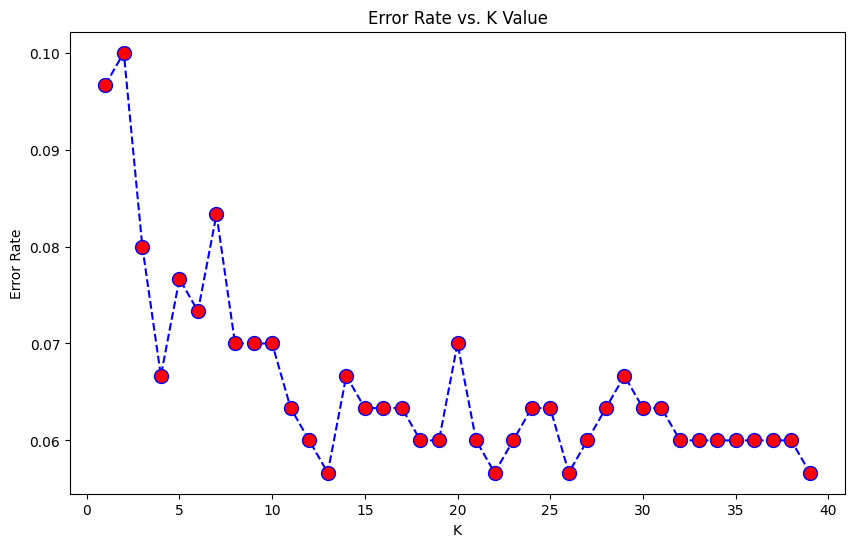

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       150
           1       0.93      0.96      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

